In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scienceplots
import cv2 as cv
from sklearn.cluster import KMeans
np.random.seed(137)


# Example of plot

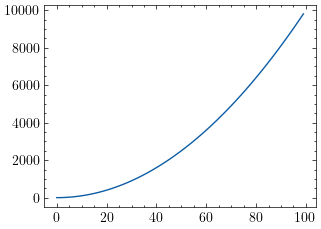

In [2]:
plt.style.use('science')
x=np.arange(100)
y=x**2
with plt.style.context('science'):
    plt.figure()
    plt.plot(x, y)
    plt.show()

# Generate Data

In [3]:
N1=100
N2=200
mu_1=np.array([1,1])
sigma_1=0.2*np.identity(2)
mu_2=np.array([-1,-1])
sigma_2=0.4*np.identity(2)
X1=np.random.multivariate_normal(mu_1,sigma_1,N1)
X2=np.random.multivariate_normal(mu_2,sigma_2,N2)
X=np.concatenate((X1,X2),axis=0)


# Illustrate Data

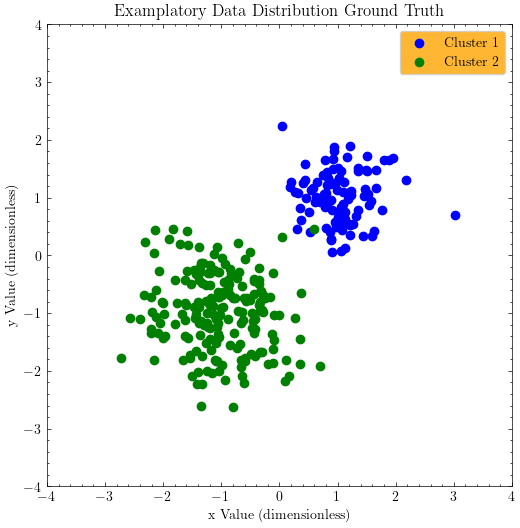

In [4]:
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [6, 6]
    ax=plt.figure()
    plt.title("Examplatory Data Distribution Ground Truth")
    plt.scatter(X1[:,0],X1[:,1],label="Cluster 1", color="blue")
    plt.scatter(X2[:,0],X2[:,1],label="Cluster 2", color="green")
    plt.xlabel("x Value (dimensionless)")
    plt.ylabel("y Value (dimensionless)")
    plt.legend(frameon=True, facecolor="orange")
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.legend(frameon=True, facecolor="orange")
    plt.show()



# K means Illustration first step

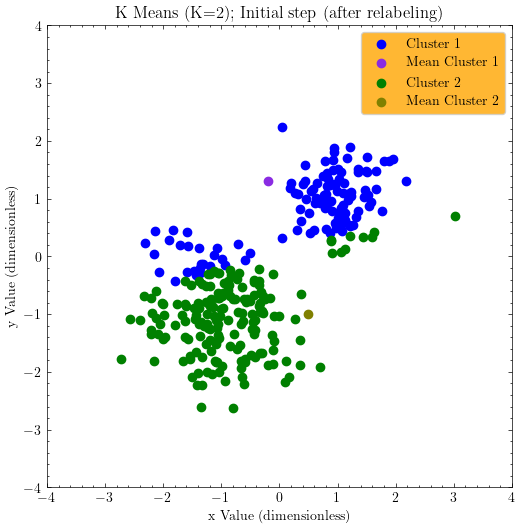

In [5]:
y1=np.array([-0.2,1.3])
y2=np.array([0.5,-1])

r1=np.sum((X-y1.reshape((-1,2)))**2,axis=1)
r2=np.sum((X-y2.reshape((-1,2)))**2,axis=1)

index=r1<=r2
Y1=X[index,:]
Y2=X[index==0,:]

with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [6, 6]
    ax=plt.figure()
    plt.title("K Means (K=2); Initial step (after relabeling)")
    plt.scatter(Y1[:,0],Y1[:,1],label="Cluster 1", color="blue")
    plt.scatter(y1[0],y1[1],label="Mean Cluster 1", color="blueviolet")
    plt.scatter(Y2[:,0],Y2[:,1],label="Cluster 2", color="green")
    plt.scatter(y2[0],y2[1],label="Mean Cluster 2", color="olive")
    plt.xlabel("x Value (dimensionless)")
    plt.ylabel("y Value (dimensionless)")
    plt.legend(frameon=True, facecolor="orange")
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.legend(frameon=True, facecolor="orange")
    plt.show()

# K Means Illustration Last step

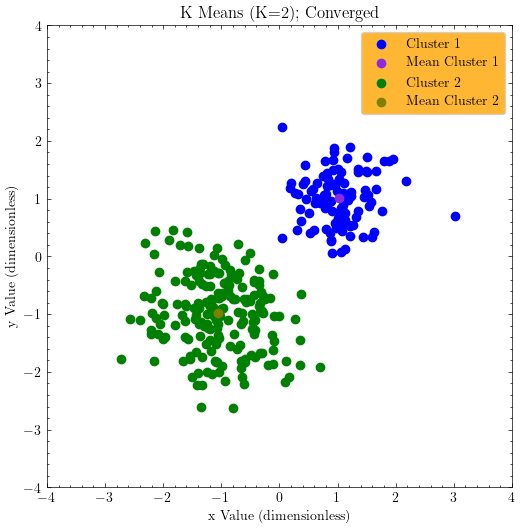

In [6]:
for i in range(1000):
    y1=np.mean(Y1,axis=0)
    y2=np.mean(Y2,axis=0)
    r1=np.sum((X-y1.reshape((-1,2)))**2,axis=1)
    r2=np.sum((X-y2.reshape((-1,2)))**2,axis=1)
    if (index==(r1<=r2)).all():
        break
    index=r1<=r2
    Y1=X[index,:]
    Y2=X[index==0,:]

with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [6, 6]
    ax=plt.figure()
    plt.title("K Means (K=2); Converged")
    plt.scatter(Y1[:,0],Y1[:,1],label="Cluster 1", color="blue")
    plt.scatter(y1[0],y1[1],label="Mean Cluster 1", color="blueviolet")
    plt.scatter(Y2[:,0],Y2[:,1],label="Cluster 2", color="green")
    plt.scatter(y2[0],y2[1],label="Mean Cluster 2", color="olive")
    plt.xlabel("x Value (dimensionless)")
    plt.ylabel("y Value (dimensionless)")
    plt.legend(frameon=True, facecolor="orange")
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.legend(frameon=True, facecolor="orange")
    plt.show()